In [1]:
#imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [3]:
df = pd.read_csv("../data/oscars.csv")

print(df.head())


               film ceremony  actor_in_a_leading_role  \
0                38     59th                      0.0   
1  Crocodile Dundee     59th                      0.0   
2    Round Midnight     59th                      0.0   
3                10     52nd                      0.0   
4    102 Dalmatians     73rd                      0.0   

   actor_in_a_supporting_role  actress_in_a_leading_role  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         0.0                        0.0   

   actress_in_a_supporting_role  animated_feature_film  animated_short_film  \
0                           0.0                    0.0                  0.0   
1                           0.0                    0.0                  0.0   
2                           0.0                    0.0     

In [4]:
print(df.info())
print(df.isnull().sum())
print(df.duplicated().sum())
print(df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4648 entries, 0 to 4647
Data columns (total 58 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   film                          4648 non-null   object 
 1   ceremony                      4648 non-null   object 
 2   actor_in_a_leading_role       4648 non-null   float64
 3   actor_in_a_supporting_role    4648 non-null   float64
 4   actress_in_a_leading_role     4648 non-null   float64
 5   actress_in_a_supporting_role  4648 non-null   float64
 6   animated_feature_film         4648 non-null   float64
 7   animated_short_film           4648 non-null   float64
 8   best_picture                  4648 non-null   float64
 9   cinematography                4648 non-null   float64
 10  costume_design                4648 non-null   float64
 11  directing                     4648 non-null   float64
 12  documentary_feature_film      4648 non-null   float64
 13  doc

In [6]:

df['won'] = df['total_oscars_won'].apply(lambda x: 1 if x >= 1 else 0)


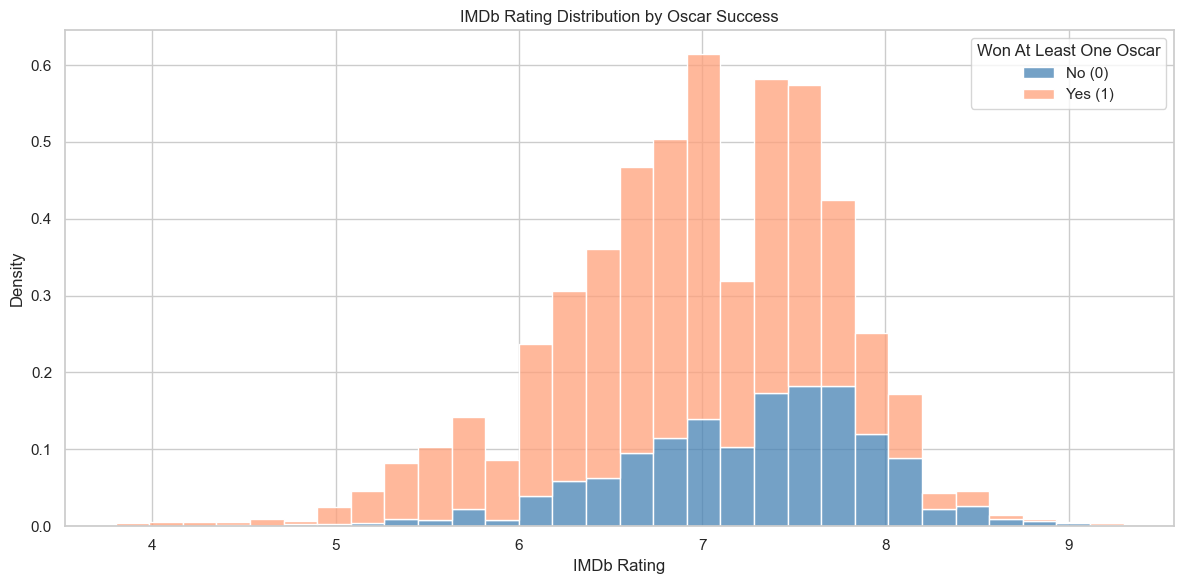

In [7]:
# Plot the distribution of IMDb ratings for movies that did and did not win at least one Oscar
# Helps visualize whether higher-rated movies are more likely to receive Oscar recognition

sns.set(style="whitegrid")
custom_palette = {0: "#FFA07A", 1: "#4682B4"}  

plt.figure(figsize=(12, 6))
sns.histplot(
    data=df,
    x="imdb_rating",
    hue="won",
    kde=False,
    stat="density",
    bins=30,
    palette=custom_palette,
    multiple="stack"
)

plt.title("IMDb Rating Distribution by Oscar Success")
plt.xlabel("IMDb Rating")
plt.ylabel("Density")
plt.legend(title="Won At Least One Oscar", labels=["No (0)", "Yes (1)"])
plt.tight_layout()
plt.show()






Oscar-winning films tend to have higher IMDb ratings overall, but some highly rated movies still don’t win. While good ratings help, they don’t guarantee Oscar success.


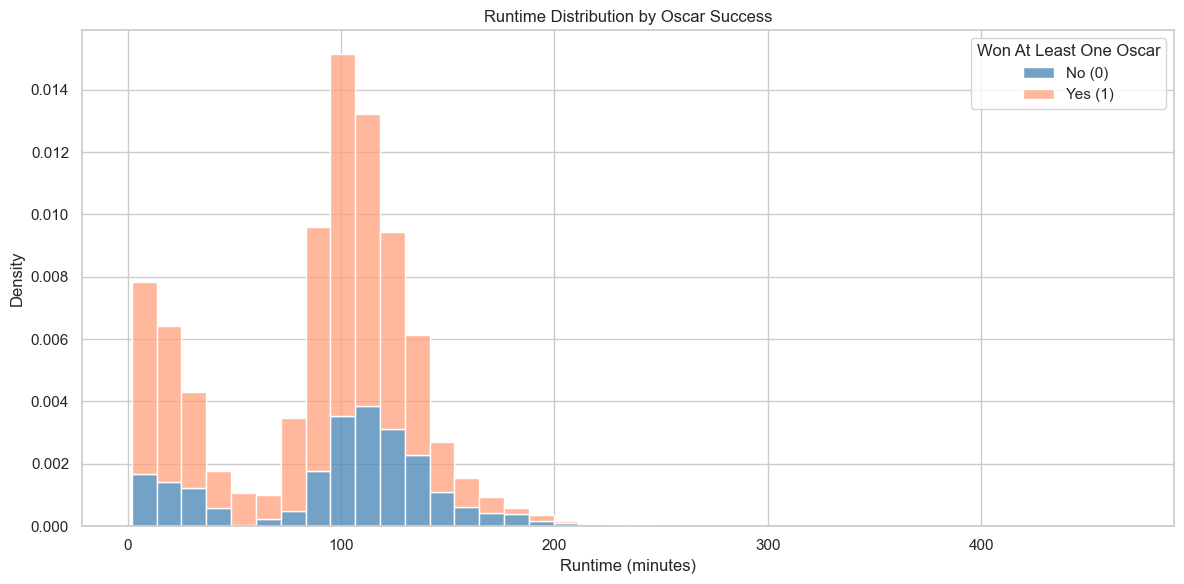

In [8]:
#Runtime Distribution by Oscar Wins
# Helps visualize whether longer movies are more likely to win

sns.set(style="whitegrid")
custom_palette = {0: "#FFA07A", 1: "#4682B4"} 

plt.figure(figsize=(12, 6))
sns.histplot(
    data=df,
    x="runtime_mins",
    hue="won",
    bins=40,
    stat="density",
    multiple="stack",
    palette=custom_palette,
    kde=False
)

plt.title("Runtime Distribution by Oscar Success")
plt.xlabel("Runtime (minutes)")
plt.ylabel("Density")
plt.legend(title="Won At Least One Oscar", labels=["No (0)", "Yes (1)"])
plt.tight_layout()
plt.show()






Oscar-winning films tend to run slightly longer, clustering around 100–120 minutes. Shorter runtimes are more common among movies that don’t win, possibly due to lower complexity or limited eligibility across categories.


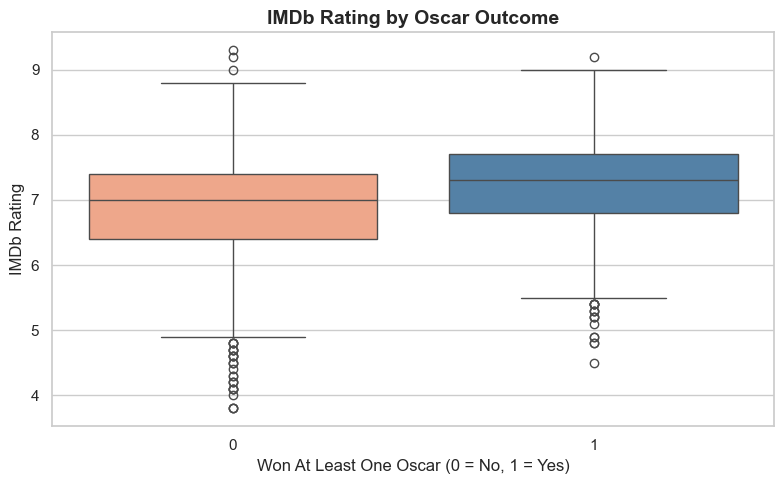

In [12]:
# IMDb Rating vs Oscar Outcome
# comparing IMDb rating for Oscar-winning vs. non-winning films

sns.set(style="whitegrid")

df['won_str'] = df['won'].astype(str)

custom_palette = {"0": "#FFA07A", "1": "#4682B4"}

plt.figure(figsize=(8, 5))
sns.boxplot(
    data=df,
    x='won_str',
    y='imdb_rating',
    hue='won_str',
    palette=custom_palette,
    legend=False  
)

plt.title("IMDb Rating by Oscar Outcome", fontsize=14, fontweight='bold')
plt.xlabel("Won At Least One Oscar (0 = No, 1 = Yes)", fontsize=12)
plt.ylabel("IMDb Rating", fontsize=12)
plt.tight_layout()
plt.show()




Oscar-winning movies tend to have higher IMDb ratings on average, with most clustered between 7.0 and 8.0. However, there’s still overlap, some lower rated movies do win, and some high rated movies don’t.

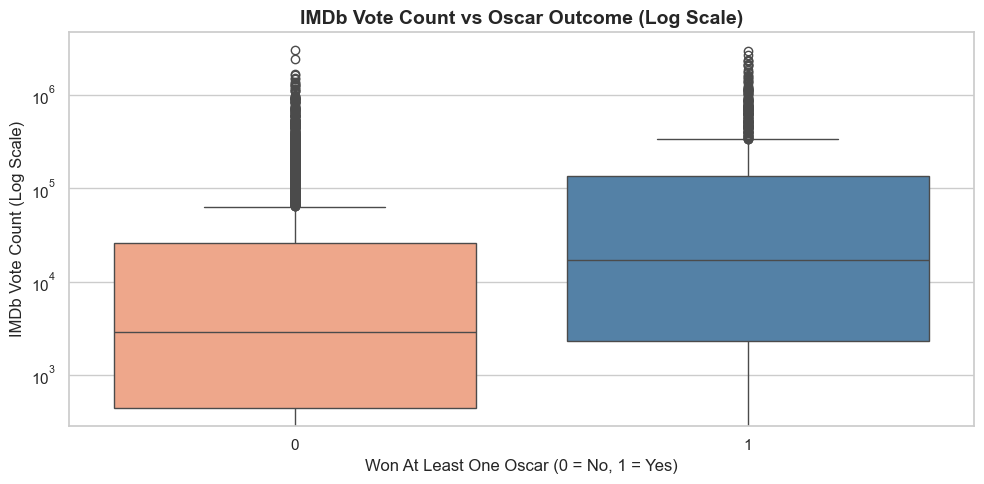

In [16]:
#IMDb Vote Count by Oscar Win

sns.set(style="whitegrid")
custom_palette = {"0": "#FFA07A", "1": "#4682B4"}

df['won_str'] = df['won'].astype(str)

plt.figure(figsize=(10, 5))
sns.boxplot(
    data=df,
    x='won_str',
    y='num_votes',
    hue='won_str',
    palette=custom_palette,
    legend=False  
)

plt.yscale('log')  
plt.title("IMDb Vote Count vs Oscar Outcome (Log Scale)", fontsize=14, fontweight='bold')
plt.xlabel("Won At Least One Oscar (0 = No, 1 = Yes)", fontsize=12)
plt.ylabel("IMDb Vote Count (Log Scale)", fontsize=12)
plt.tight_layout()
plt.show()



Oscar-winning movies tend to have far more IMDb votes, suggesting they’re often more well-known or widely seen. While popularity alone doesn't guarantee a win, higher visibility seems to help. 

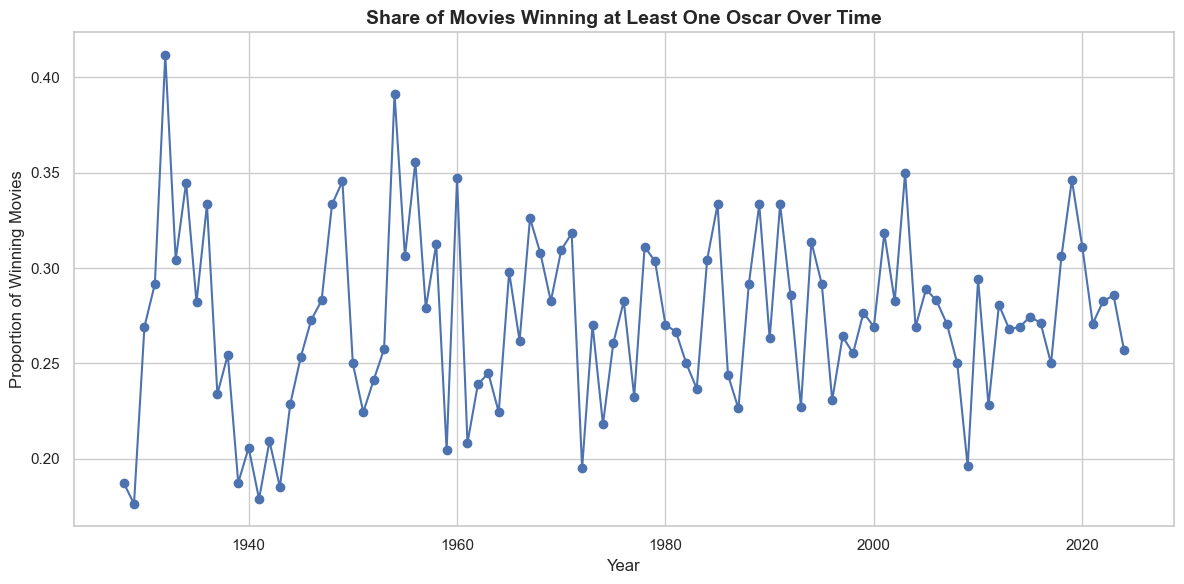

In [17]:
#Share of Oscar-Winning Films Over Time

# Group by year and calculate % of films that won at least one Oscar
yearly_win_share = df.groupby('year')['won'].mean()

plt.figure(figsize=(12, 6))
yearly_win_share.plot(marker='o')
plt.title("Share of Movies Winning at Least One Oscar Over Time", fontsize=14, fontweight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Proportion of Winning Movies", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()



The proportion of Oscar-winning movies each year fluctuates between 20–35%. While the Oscars remain competitive, there’s no strong upward or downward trend suggesting that winning at least one Oscar has remained equally difficult over time.


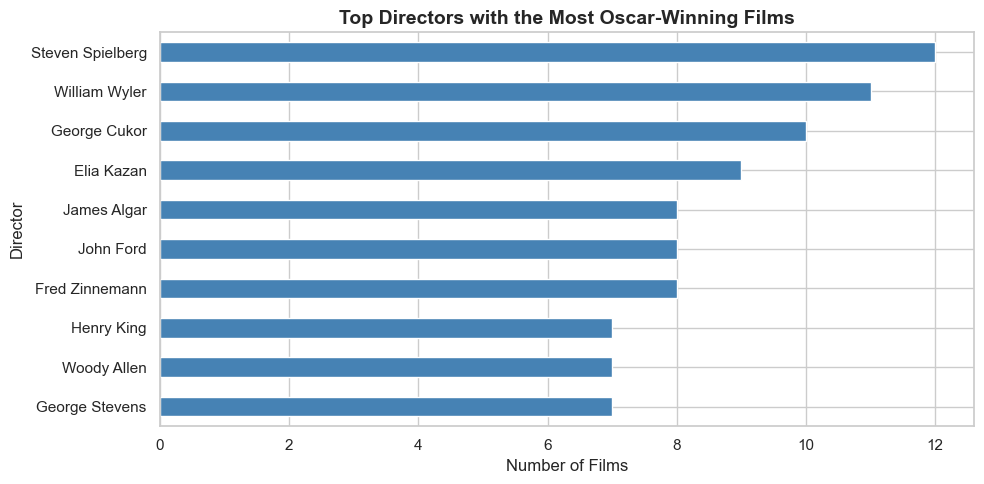

In [19]:
# Most Frequent Oscar-Winning Directors

# Filter to only movies that won at least one Oscar
oscar_winners = df[df['won'] == 1]

# Count top directors by number of Oscar-winning films
top_directors = oscar_winners['directors'].value_counts().head(10)


plt.figure(figsize=(10, 5))
top_directors.plot(kind='barh', color="#4682B4")
plt.title("Top Directors with the Most Oscar-Winning Films", fontsize=14, fontweight='bold')
plt.xlabel("Number of Films")
plt.ylabel("Director")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()





This chart highlights directors who most frequently led Oscar-winning films. While this information isn't used directly in our model, it helps identify influential filmmakers whose work consistently resonates with Academy voters offering insight for directors aiming to boost their Oscar chances.

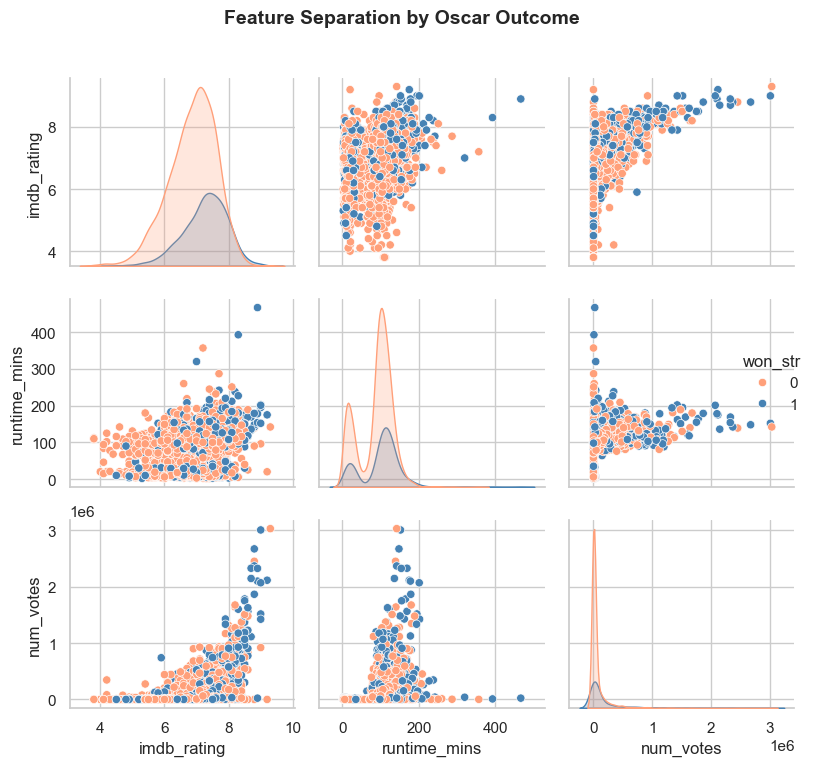

In [21]:
# Pairplot of features vs Oscar outcome to reveal potential class separation


# Select features
pairplot_features = ['imdb_rating', 'runtime_mins', 'num_votes', 'won']

# Drop any rows with missing values 
pairplot_df = df[pairplot_features].dropna()

# Convert won to string for clear labels
pairplot_df['won_str'] = pairplot_df['won'].astype(str)


sns.pairplot(pairplot_df, vars=['imdb_rating', 'runtime_mins', 'num_votes'], hue='won_str', palette={"0": "#FFA07A", "1": "#4682B4"})
plt.suptitle("Feature Separation by Oscar Outcome", y=1.02, fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


This pairplot shows how IMDb rating, runtime, and vote count relate to whether a movie won at least one Oscar. Oscar-winning films (orange) tend to have slightly higher IMDb ratings, longer runtimes, and more votes overall compared to non-winners (blue). However, the overlap across categories suggests these features alone may not strongly separate the classes, but they can still be useful in a predictive model.

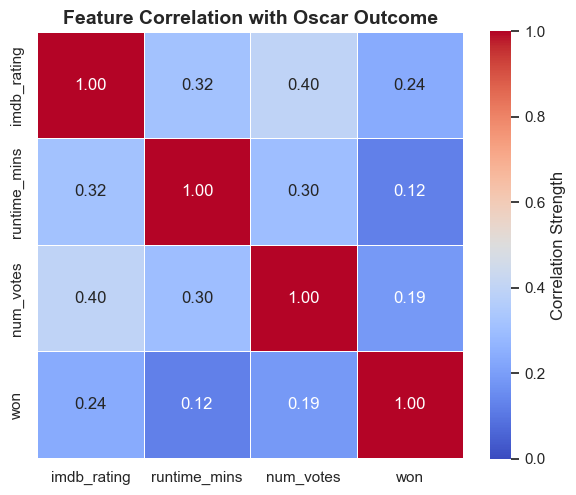

In [22]:
# Feature Correlation with Oscar Outcome

# Select relevant numeric features
corr_features = ['imdb_rating', 'runtime_mins', 'num_votes', 'won']
corr_matrix = df[corr_features].corr()

plt.figure(figsize=(6, 5))
sns.heatmap(
    corr_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap="coolwarm", 
    vmin=0, 
    vmax=1, 
    square=True, 
    linewidths=0.5, 
    cbar_kws={'label': 'Correlation Strength'}
)

plt.title("Feature Correlation with Oscar Outcome", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


imdb_rating has the strongest correlation with won (0.24), suggesting higher rated movies are more likely to win.
runtime_mins and num_votes show weaker but positive relationships.
Correlations are not very strong, but that’s common with real world classification problems  and still useful for modeling.

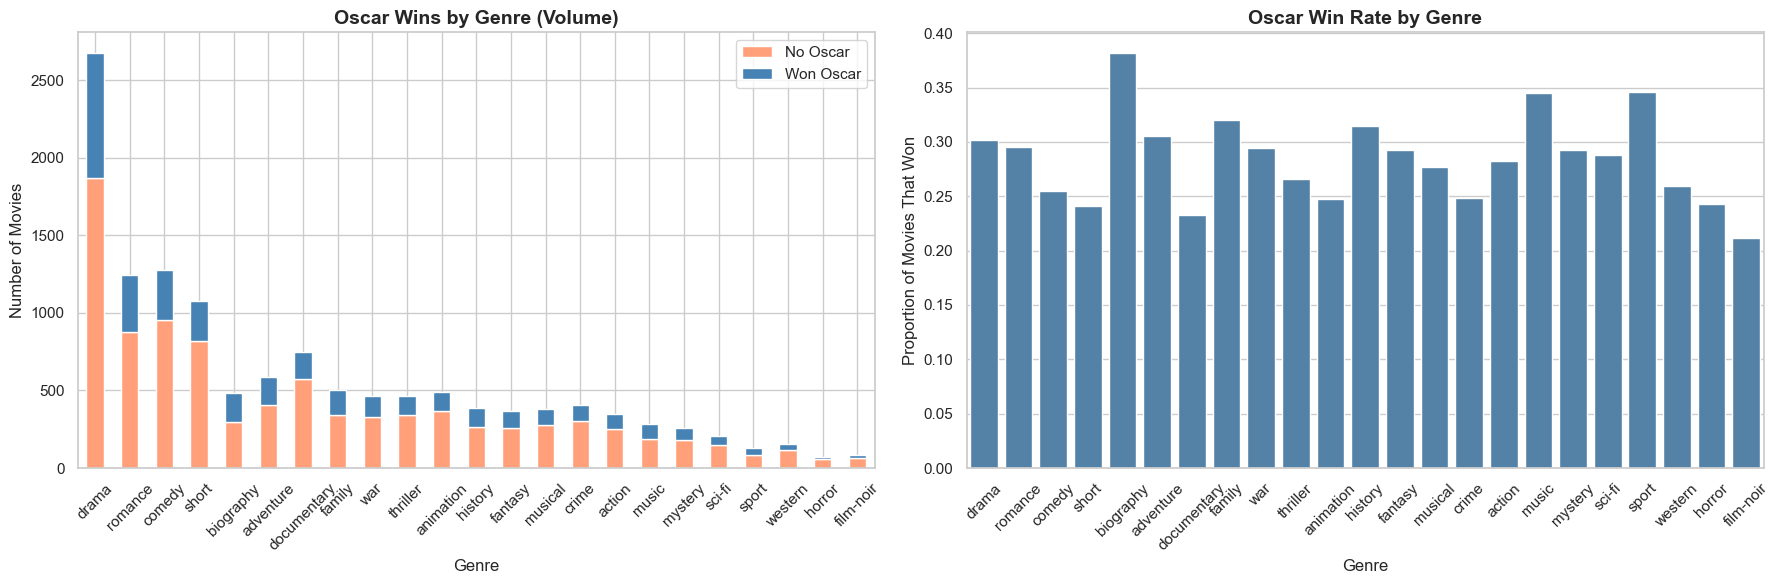

In [25]:
# List of film genres
film_genres = [
    'action', 'adventure', 'animation', 'biography', 'comedy', 'crime',
    'documentary', 'drama', 'family', 'fantasy', 'film-noir', 'history',
    'horror', 'music', 'musical', 'mystery', 'romance', 'sci-fi',
    'short', 'sport', 'thriller', 'war', 'western'
]

# Create stacked bar data: count of won=0 and won=1 for each genre
genre_counts = {
    genre: df[df[genre] == 1]['won'].value_counts().reindex([0, 1], fill_value=0)
    for genre in film_genres
}
genre_stack_df = pd.DataFrame(genre_counts).T
genre_stack_df.columns = ['No Oscar', 'Won Oscar']
genre_stack_df = genre_stack_df.sort_values('Won Oscar', ascending=False)

# Create win rate data
genre_win_rates = {
    genre: df[df[genre] == 1]['won'].mean()
    for genre in film_genres
}
genre_rate_df = pd.DataFrame.from_dict(genre_win_rates, orient='index', columns=['win_rate'])
genre_rate_df = genre_rate_df.loc[genre_stack_df.index]  # match order to stacked chart

# Plot side-by-side
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot 1: Stacked bar chart (volume)
genre_stack_df.plot(kind='bar', stacked=True, ax=axes[0], color=["#FFA07A", "#4682B4"])
axes[0].set_title("Oscar Wins by Genre (Volume)", fontsize=14, fontweight='bold')
axes[0].set_xlabel("Genre")
axes[0].set_ylabel("Number of Movies")
axes[0].tick_params(axis='x', rotation=45)

# Plot 2: Win rate bar chart (efficiency)
sns.barplot(x=genre_rate_df.index, y=genre_rate_df['win_rate'], ax=axes[1], color="#4682B4")
axes[1].set_title("Oscar Win Rate by Genre", fontsize=14, fontweight='bold')
axes[1].set_xlabel("Genre")
axes[1].set_ylabel("Proportion of Movies That Won")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


### Oscar Wins by Genre (Side by Side Comparison)

The left chart shows the total number of movies per genre, split by whether they won an Oscar or not. Genres like Drama, Romance, and Comedy have high counts but many of these films did not win.

The right chart shows the Oscar win rate by genre, which represents the proportion of films in each genre that won at least one Oscar.

### Key Takeaways

- High volume does not mean high success: Drama has the most films but only an average win rate.
- Genres like Biography, Music, and Sport have fewer films but higher win rates.
- Genres like Horror and Film-Noir tend to have both low volume and low win rates.

### Why This Matters

Directors aiming to win an Oscar should consider not just popular genres but also those with a higher historical success rate.


### Feature Selection Summary

The following visualizations helped identify the most useful features for predicting Oscar wins:

- **IMDb Rating (Boxplot & Histogram):** Showed that higher-rated films are more likely to win.
- **Runtime (Histogram):** Revealed that longer films tend to perform better.
- **IMDb Vote Count (Boxplot, Log Scale):** Highlighted that winning films often have more audience votes.
- **Genre Win Rate (Bar Chart):** Helped select one-hot encoded genre features based on success rates.
- **Feature Correlation Heatmap:** Confirmed positive relationships between selected features and the target variable.

### Selected Features for Modeling

- `imdb_rating`
- `runtime_mins`
- `num_votes`
- One-hot encoded genre columns (e.g., `drama`, `biography`, `comedy`, etc.)
- (Optional) `title_type` and top `directors` if properly encoded

These features were chosen based on strong visual patterns, practical relevance to Oscar trends, and their predictive value observed during exploratory analysis.
